In [4]:
import numpy as np       
import pandas as pd      
import matplotlib.pyplot as plt  
import seaborn as sns     
from sklearn.cluster import KMeans, DBSCAN  
from sklearn.preprocessing import StandardScaler  
from sklearn.metrics import silhouette_score 


In [10]:
df = pd.read_csv("student_clustering.csv")
df.head()


,cgpa,iq
0,5.13,88
1,5.90,113
2,8.36,93
3,8.27,97
4,5.45,110


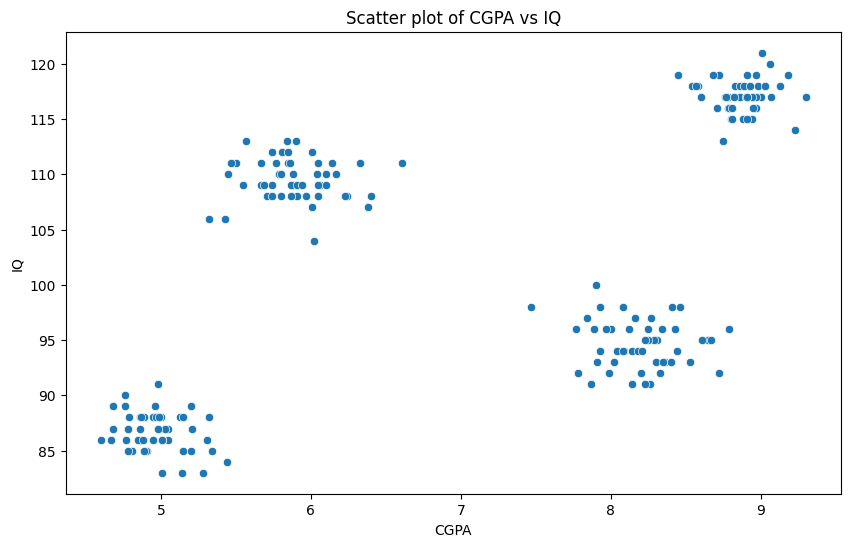

In [6]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x='cgpa', y='iq', data=df)
plt.title('Scatter plot of CGPA vs IQ')
plt.xlabel('CGPA')
plt.ylabel('IQ')
plt.show()

In [9]:
df.info

<bound method DataFrame.info of      cgpa   iq
0    5.13   88
1    5.90  113
2    8.36   93
3    8.27   97
4    5.45  110
..    ...  ...
195  4.68   89
196  8.57  118
197  5.85  112
198  6.23  108
199  8.82  117

[200 rows x 2 columns]>

In [12]:
wcss = []

for i in range(1, 11):
    model = KMeans(n_clusters=i)
    model.fit(df)
    wcss.append(model.inertia_)

wcss

[29957.898288,
 4184.14127,
 2362.713349,
 681.96966,
 576.1106016439908,
 395.9605877691832,
 350.51085599451807,
 233.54082485509014,
 233.88826385434245,
 200.97690408687023]

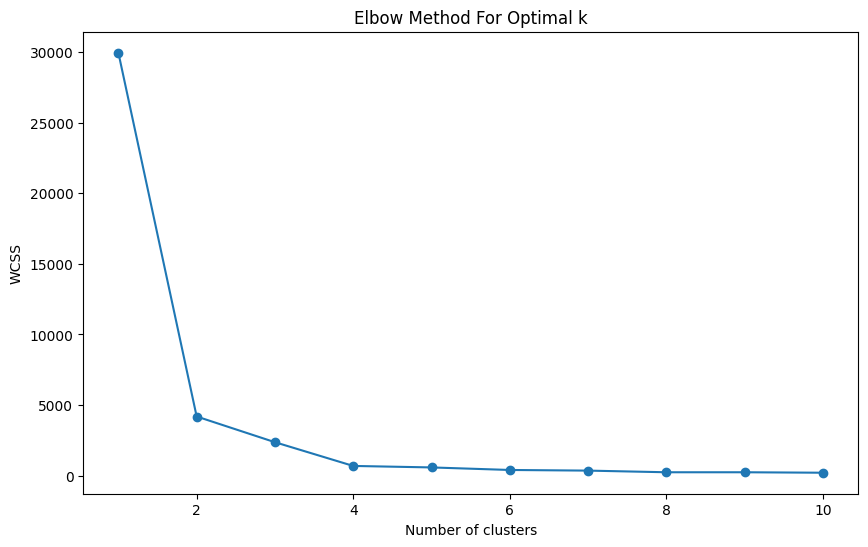

In [13]:
plt.figure(figsize=(10, 6))
plt.plot(range(1, 11), wcss, marker='o')
plt.title('Elbow Method For Optimal k')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

In [14]:
x = df.to_numpy()
x

array([[  5.13,  88.  ],
       [  5.9 , 113.  ],
       [  8.36,  93.  ],
       [  8.27,  97.  ],
       [  5.45, 110.  ],
       [  5.88, 109.  ],
       [  8.41,  98.  ],
       [  8.8 , 115.  ],
       [  5.79, 110.  ],
       [  8.09,  94.  ],
       [  4.6 ,  86.  ],
       [  6.1 , 110.  ],
       [  8.16,  97.  ],
       [  5.  ,  88.  ],
       [  5.71, 108.  ],
       [  8.31,  95.  ],
       [  5.5 , 111.  ],
       [  7.87,  91.  ],
       [  6.05, 111.  ],
       [  5.84, 113.  ],
       [  7.47,  98.  ],
       [  4.86,  86.  ],
       [  7.78,  92.  ],
       [  4.78,  87.  ],
       [  4.96,  88.  ],
       [  7.93,  98.  ],
       [  4.86,  87.  ],
       [  9.18, 119.  ],
       [  8.04,  94.  ],
       [  5.43, 106.  ],
       [  8.86, 117.  ],
       [  6.01, 112.  ],
       [  8.83, 118.  ],
       [  5.32, 106.  ],
       [  7.77,  96.  ],
       [  8.  ,  96.  ],
       [  8.56, 118.  ],
       [  5.91, 108.  ],
       [  5.44,  84.  ],
       [  5.57, 113.  ],


In [18]:
X = df.iloc[:,:].values
X

array([[  5.13,  88.  ],
       [  5.9 , 113.  ],
       [  8.36,  93.  ],
       [  8.27,  97.  ],
       [  5.45, 110.  ],
       [  5.88, 109.  ],
       [  8.41,  98.  ],
       [  8.8 , 115.  ],
       [  5.79, 110.  ],
       [  8.09,  94.  ],
       [  4.6 ,  86.  ],
       [  6.1 , 110.  ],
       [  8.16,  97.  ],
       [  5.  ,  88.  ],
       [  5.71, 108.  ],
       [  8.31,  95.  ],
       [  5.5 , 111.  ],
       [  7.87,  91.  ],
       [  6.05, 111.  ],
       [  5.84, 113.  ],
       [  7.47,  98.  ],
       [  4.86,  86.  ],
       [  7.78,  92.  ],
       [  4.78,  87.  ],
       [  4.96,  88.  ],
       [  7.93,  98.  ],
       [  4.86,  87.  ],
       [  9.18, 119.  ],
       [  8.04,  94.  ],
       [  5.43, 106.  ],
       [  8.86, 117.  ],
       [  6.01, 112.  ],
       [  8.83, 118.  ],
       [  5.32, 106.  ],
       [  7.77,  96.  ],
       [  8.  ,  96.  ],
       [  8.56, 118.  ],
       [  5.91, 108.  ],
       [  5.44,  84.  ],
       [  5.57, 113.  ],


In [21]:
model = KMeans(n_clusters=4)
y = model.fit_predict(X)
y


array([3, 2, 1, 1, 2, 2, 1, 0, 2, 1, 3, 2, 1, 3, 2, 1, 2, 1, 2, 2, 1, 3,
       1, 3, 3, 1, 3, 0, 1, 2, 0, 2, 0, 2, 1, 1, 0, 2, 3, 2, 3, 1, 1, 3,
       0, 0, 1, 2, 0, 2, 3, 3, 0, 1, 0, 2, 2, 0, 2, 0, 2, 1, 1, 0, 3, 0,
       1, 3, 2, 1, 2, 0, 1, 3, 2, 0, 2, 0, 3, 1, 1, 0, 2, 3, 0, 3, 0, 2,
       0, 2, 0, 0, 1, 3, 1, 1, 0, 1, 3, 0, 2, 3, 3, 0, 3, 3, 1, 3, 0, 0,
       1, 0, 2, 2, 1, 0, 1, 2, 0, 3, 3, 2, 1, 0, 1, 3, 1, 2, 3, 1, 1, 2,
       3, 3, 2, 0, 2, 3, 1, 1, 1, 3, 2, 3, 3, 0, 3, 0, 2, 3, 0, 3, 0, 0,
       3, 1, 2, 0, 2, 1, 3, 0, 2, 1, 0, 3, 2, 3, 3, 0, 0, 2, 0, 3, 3, 1,
       0, 2, 3, 0, 0, 2, 2, 2, 1, 3, 1, 1, 0, 2, 1, 1, 3, 3, 1, 3, 0, 2,
       2, 0], dtype=int32)

In [22]:
df["Classes"] = y
df

,cgpa,iq,Classes
0,5.13,88,3
1,5.90,113,2
2,8.36,93,1
3,8.27,97,1
4,5.45,110,2
...,...,...,...
195,4.68,89,3
196,8.57,118,0
197,5.85,112,2
198,6.23,108,2
